In [82]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc

import animations


In [84]:
Diffusion = 0.009
Convection = -0.1

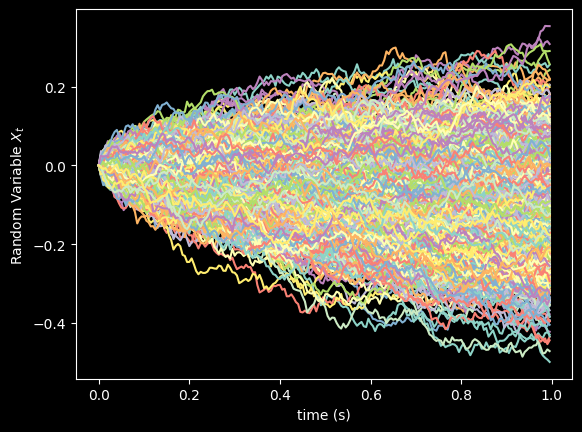

In [85]:
# Ito Process model driven by standard Wiener process

# number of simulations
nsim = 1000

# Number of partitions
N = 200
t = np.zeros(N)
X_t = np.zeros((nsim, N))
X_t[:, 0] = 0
dt = (1-0)/N

mu_c = Convection
sigma_c = np.sqrt(2*Diffusion)

# Drift
def mu(X, t):
    return mu_c

# Standard Deviation
def sigma(X, t):
    return sigma_c

# Brownian motion
def dW(dt):
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))

for j in range(nsim):
    for k in range(0, N-1):
        t[k+1] = t[k] + dt
        x = X_t[j, k]
        X_t[j, k+1] = x + mu(x, t)*dt + sigma(x, t)*dW(dt)
        
    plt.plot(t, X_t[j])

plt.xlabel("time (s)")
h = plt.ylabel("Random Variable $X_t$")
h.set_rotation(90)
plt.show()

In [86]:
# Number of space and time steps
Nt = 199
Nx = 200

# Space and time step size
dt = (1-0)/Nt
dx = (2-(-2))/Nx

# Setting up the initial condition
x = np.arange(-2, 2, dx)

# Initial Array
sigma = 0.01
amp = 1

init = amp*(1/np.sqrt(0.001*2*np.pi))*np.exp(-(1/2)*((x**2)/0.001))

In [87]:
def solve(Nt, Nx, dt, dx, Diffusion, Convection, init):
    FokkerPlank = dc.convection_diffusion_1dims(Nt, Nx, dt, dx, Diffusion, Convection, init)
    sol_Dirichlet = FokkerPlank.solve_Dirichlet(boundary=[0, 0])
    sol_Neumann = FokkerPlank.solve_Neumann(boundary_flux=[0, 0])

    return sol_Dirichlet.solution, sol_Neumann.solution

In [88]:
dirichlet, neumann = solve(Nt, Nx, dt, dx, Diffusion, Convection, init)

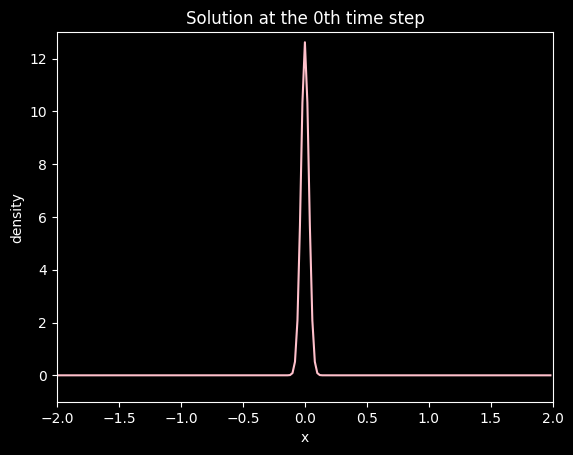

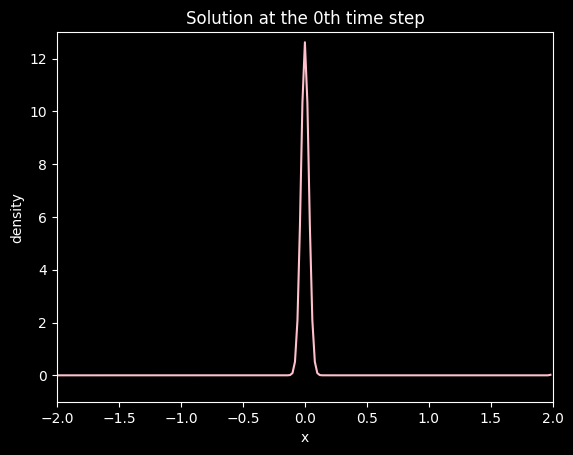

In [89]:
# Plotting the 0th time step state
plt.figure(0)
ax = plt.axes(xlim=(-2, 2), ylim=(-1, 13)) # left bound -5 and right bound 5
ax.plot(x, dirichlet[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

# Plotting the 0th time step state
plt.figure(1)
ax = plt.axes(xlim=(-2, 2), ylim=(-1, 13)) # left bound -5 and right bound 5
ax.plot(x, neumann[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

In [90]:
# Setting up the animation
FPS = 60
FRN = 199
FILE_1 = './example-img/convection_diffusion_in_1_dimension_dirichlet.gif'
FILE_2 = './example-img/convection_diffusion_in_1_dimension_neumann.gif'

# Calling the animation_() function defined in the previous cell.
# See the animation at ./example-img/convection_in_1_dimension.gif
animations.animation_1(
    solution=dirichlet, 
    X=x, 
    xlab='X', 
    ylab='PDF', 
    title='Animation of PDF with Dirichlet BCs', 
    color='pink', 
    xlim_=(-2, 2), 
    ylim_=(-1, 13), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE_1
    )

animations.animation_1(
    solution=neumann, 
    X=x, 
    xlab='X', 
    ylab='PDF', 
    title='Animation of PDF with Neumann BCs', 
    color='pink', 
    xlim_=(-2, 2), 
    ylim_=(-1, 13), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE_2
    )

In [91]:
FILE_3 = './example-img/Ito_Process_Histogram.gif'

animations.animate_histogram(
    data=X_t, 
    solution=dirichlet,
    X=np.arange(-2, 2, dx),
    bins=100, 
    interval=100, 
    xlim=(-2, 2),
    xlab='X_t', 
    title='Histogram of Ito Process', 
    color='purple',
    color_curve='pink',
    fps=60, 
    frn=201, 
    filename=FILE_3
    )